# Example - Plots for the application note

This example features code to reproduce plots featured in the figure of the application note, that are not included in the other example notebooks. For a proper introduction to the package, please take a look at `Example-Standard_Workflow.ipynb` instead.

### Data Import

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm
from scipy.stats import spearmanr
import numpy as np
import pandas as pd
import deconomix
from tqdm.notebook import tqdm

In [2]:
# Set global style parameters
plt.rcParams.update({
    'font.size': 14,                 # Global font size
    'axes.titlesize': 16,            # Title font size
    'axes.labelsize': 14,            # Axis label font size
    'xtick.labelsize': 12,           # X-tick label font size
    'ytick.labelsize': 12,           # Y-tick label font size
    'legend.fontsize': 12,           # Legend font size
    'figure.figsize': (8, 6),        # Figure size
    'axes.linewidth': 1.2,           # Line width for axes
    'grid.linewidth': 0.5,           # Line width for grid lines
    'grid.color': 'gray',            # Grid line color
    'legend.frameon': True,         # No frame for legend
    'axes.grid': False,               # Enable grid
    'grid.alpha': 0.5,
    'savefig.bbox' : 'tight',
    'savefig.pad_inches' : 0.05,
    'font.family' : 'serif',
    'mathtext.fontset' : 'dejavuserif'})

In [3]:
test, train = deconomix.utils.load_example()

Raw data already downloaded
Importing Data to Python ...
Using cached, preprocessed data
Done


In [4]:
X_ref, Y_mat, C_mat = deconomix.utils.simulate_data(train.drop("B", axis=1), n_mixtures = 1000, n_cells_in_mix = 100)
X_test , Y_test, C_test  = deconomix.utils.simulate_data(test, n_mixtures = 1000, n_cells_in_mix = 100)

### Visualization of exemplary reference and hidden profiles

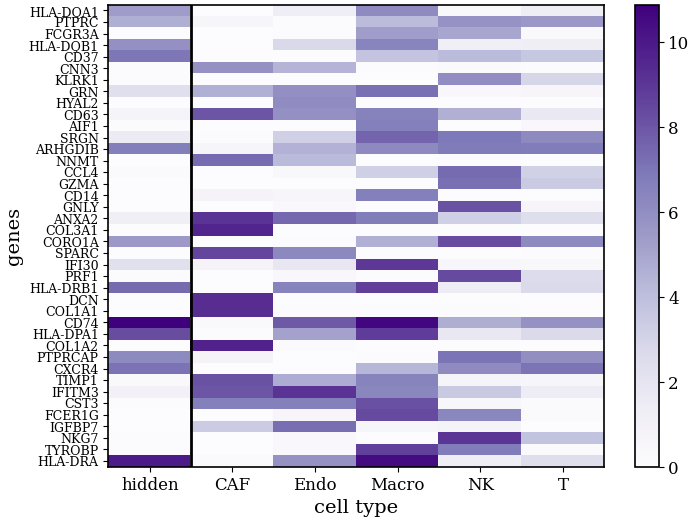

In [5]:
plt.figure()
plt.imshow(X_test.iloc[0:40,:], aspect='auto', cmap="Purples", interpolation=None, origin="lower")
plt.xticks(range(6), labels=["hidden", "CAF", "Endo", "Macro", "NK", "T"])
plt.yticks(range(40), labels=X_test.index[0:40], rotation=0, size=9);
plt.ylabel("genes")
plt.xlabel("cell type")
plt.axvline(x=0.5, color='black', linewidth=2)
plt.colorbar();
#plt.title("Expression profiles for known celltypes $X$ and hidden profile $x$")
plt.savefig("plots_appnote/png/heatmapXandHidden.png")
plt.savefig("plots_appnote/pdf/heatmapXandHidden.pdf")

### DTD Training Graph

  0%|          | 0/500 [00:00<?, ?it/s]

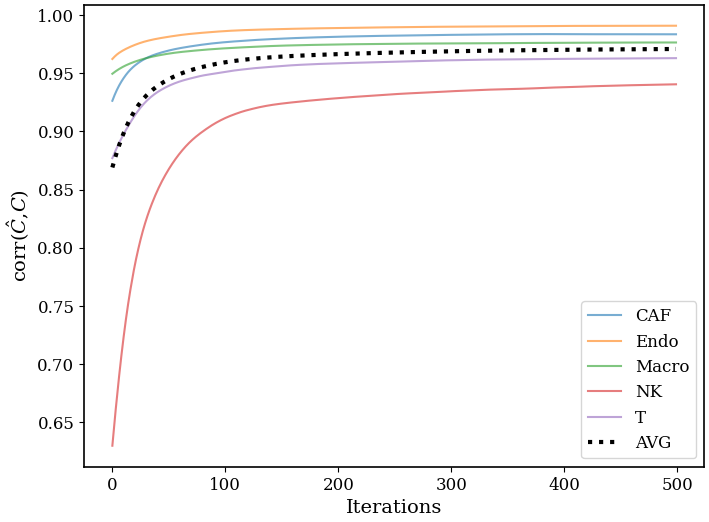

In [6]:
model_DTD = deconomix.methods.DTD(X_ref, Y_mat, C_mat)
model_DTD.run(iterations = 500, plot = True, path_plot='plots_appnote/pdf/training_overview.pdf')

### Visualization of gene weighting vs no weighting for a small cell type

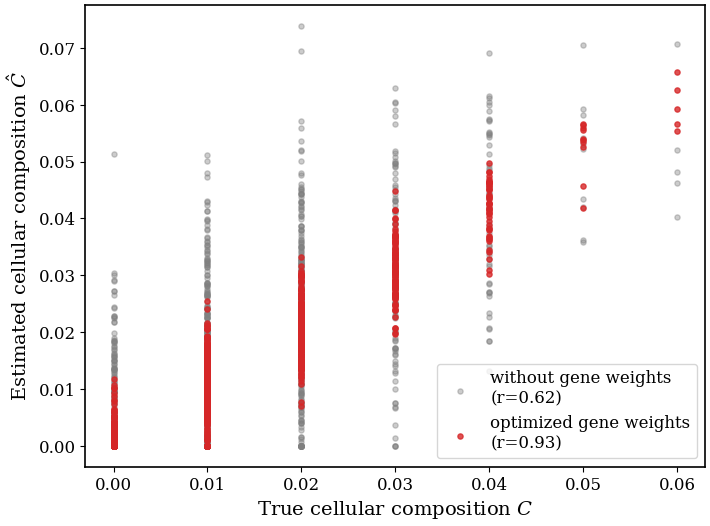

In [7]:
C_est = deconomix.utils.calculate_estimated_composition(X_ref, Y_mat, model_DTD.gamma)
gamma_naive = pd.Series(np.ones(1000))
gamma_naive.index = model_DTD.gamma.index
C_est_naive = deconomix.utils.calculate_estimated_composition(X_ref, Y_mat, gamma_naive)

plt.scatter(C_mat.loc["NK",:], C_est_naive.loc["NK",:], color="gray", alpha=0.4, s=14, label="without gene weights\n(r=0.62)")
plt.scatter(C_mat.loc["NK",:], C_est.loc["NK",:], color="C3", alpha=0.8, s=14, label= "optimized gene weights\n(r=0.93)")
plt.xlabel("True cellular composition $C$")
plt.ylabel("Estimated cellular composition $\\hat{C}$")
#plt.title("Composition estimation for NK cells on training data")
plt.legend(loc="lower right", frameon=True);
plt.savefig("plots_appnote/pdf/geneweights_vs_naive_NK_training.pdf")
plt.savefig("plots_appnote/png/geneweights_vs_naive_NK_training.png")


### Visualization of a possible cellular composition estimate

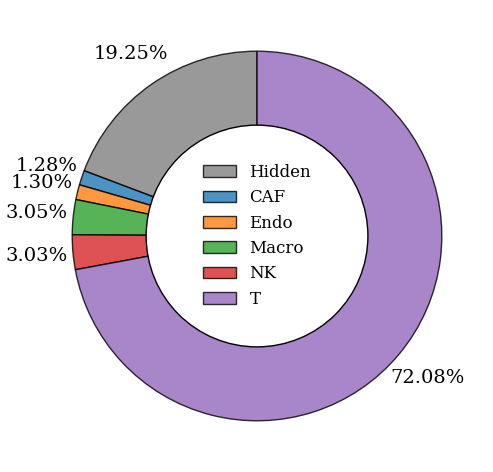

In [8]:
cell_types = list(C_test.index)
cell_types[0] = "Hidden"
values = C_test.mean(axis=1)

# Define colors (using grey for 'Hidden')
colors = ['grey','C0', 'C1', 'C2', 'C3', 'C4' ]

# Create the pie chart
plt.figure(figsize=(8,6))
plt.pie(values, labels=["","","","","",""], colors=colors, startangle=90,
       wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 1, 
                      'antialiased': True,
                      'alpha': 0.8},
       explode=[0,0,0,0,0,0],
       pctdistance=1.2,
       autopct='%1.2f%%')  #
hole = plt.Circle((0, 0), 0.6, facecolor='white', edgecolor="black")
plt.gcf().gca().add_artist(hole)

# Equal aspect ratio ensures that pie chart is drawn as a circle.
#plt.axis('equal')

# Title
#plt.title('Estimated composition of an exemplary bulk profile');
plt.legend(loc="center", labels=cell_types, edgecolor="white")

plt.savefig('plots_appnote/pdf/C_hat_piechart.pdf')
plt.savefig('plots_appnote/png/C_hat_piechart.png')


# Display the chart

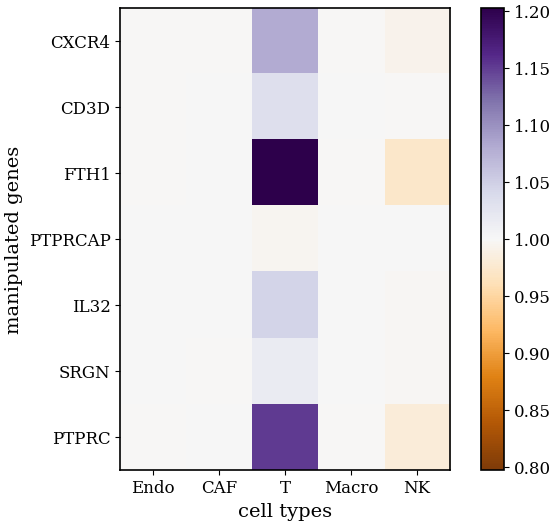

In [12]:
from matplotlib.colors import CenteredNorm
Delta_est = pd.read_pickle("Delta_est.pkl")
regulated_genes = ['CXCR4', 'CD3D', 'FTH1', 'PTPRCAP', 'IL32', 'SRGN', 'PTPRC']
plt.figure()
plt.imshow(Delta_est.loc[regulated_genes,["Endo","CAF","T","Macro","NK"]], cmap='PuOr', norm=CenteredNorm(1))
plt.yticks(ticks=range(0,len(regulated_genes)), labels=regulated_genes, rotation=0);
plt.xticks(ticks=range(0,5), labels=["Endo","CAF","T","Macro","NK"])
plt.xlabel("cell types")
plt.ylabel("manipulated genes")
#plt.title("Estimated Regulation Factors $\\Delta$")
plt.colorbar();
plt.savefig("plots_appnote/pdf/delta_heatmap.pdf")
plt.savefig("plots_appnote/png/delta_heatmap.png")